# Optimal control example

In [1]:
from pyomo.environ import *
from pyomo.dae import *
import matplotlib.pyplot as plt

In [2]:
m = ConcreteModel()

In [3]:
m.t = ContinuousSet(bounds=(0, 1))

In [4]:
m.x1 = Var(m.t, bounds=(0, 1))
m.x2 = Var(m.t, bounds=(0, 1))
m.u = Var(m.t, initialize=0)

In [5]:
m.x1dot = DerivativeVar(m.x1)
m.x2dot = DerivativeVar(m.x2)

In [6]:
m.obj = Objective(expr=m.x2[1])

In [7]:
def _x1dot(mod, i):
    if i == 0:
        return Constraint.Skip
    else:
        return mod.x1dot[i] == mod.u[i]

In [8]:
m.x1dot_con = Constraint(m.t, rule=_x1dot)

In [9]:
def _x2dot(mod, i):
    if i == 0:
        return Constraint.Skip
    else:
        return mod.x2dot[i] == mod.x1[i] ** 2 + mod.u[i] ** 2

In [10]:
m.x2dot_con = Constraint(m.t, rule=_x2dot)

In [11]:
m.init_conditions = ConstraintList()

In [12]:
m.init_conditions.add(m.x1[0] == 1)  #: initial condition for x1
m.init_conditions.add(m.x2[0] == 0)  #: initial condition for x2

## Transformation

In [13]:
discretizer = TransformationFactory("dae.collocation")

In [14]:
discretizer.apply_to(m, nfe=20, ncp=3, scheme="LAGRANGE-RADAU")

In [15]:
discretizer.reduce_collocation_points(m, var=m.u, ncp=1, contset=m.t)

In [16]:
solver = SolverFactory("ipopt")

In [17]:
results = solver.solve(m, tee=True)

/tmp/tmp8zd5c871.pyomo.nl -AMPL 
Ipopt vanilla0: 
This is Ipopt version vanilla0, running with linear solver ma27.

Number of nonzeros in equality constraint Jacobian...:      982
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      120

Total number of variables............................:      302
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      122
                     variables with only upper bounds:        0
Total number of equality constraints.................:      282
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  9.9999900e-03 9.90e-01 1.39

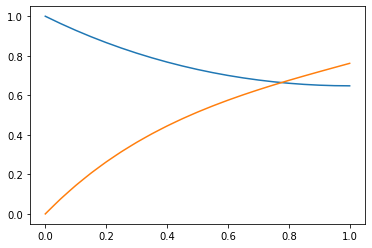

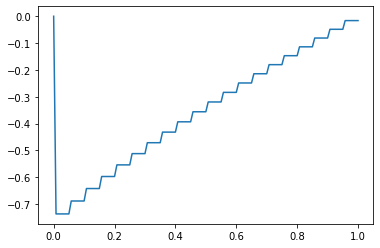

In [18]:
x1 = []
x2 = []
u = []
t = []

for i in sorted(m.t):
    t.append(i)
    x1.append(value(m.x1[i]))
    x2.append(value(m.x2[i]))
    u.append(value(m.u[i]))

plt.plot(t,x1)
plt.plot(t,x2)
plt.show()

plt.plot(t,u)
plt.show()